In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:

df = pd.read_csv("ipl.csv")

In [6]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [7]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [10]:
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

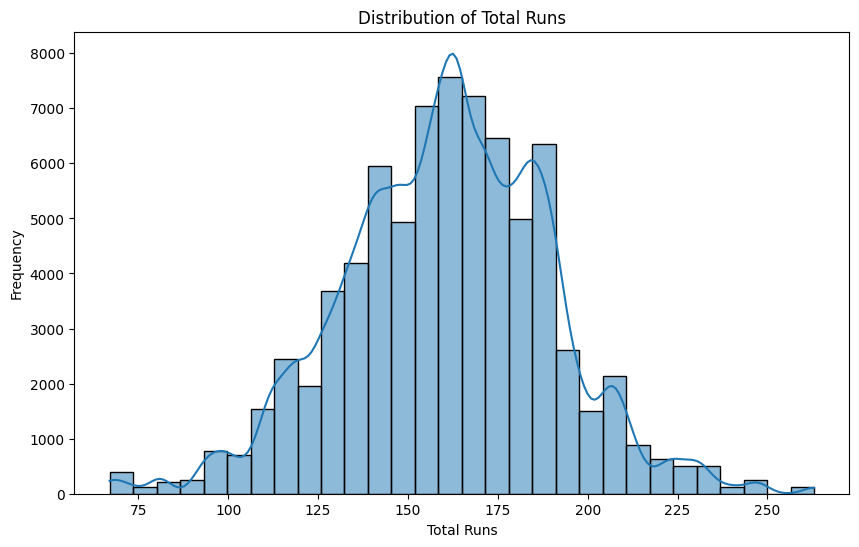

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['total'], bins=30, kde=True)
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


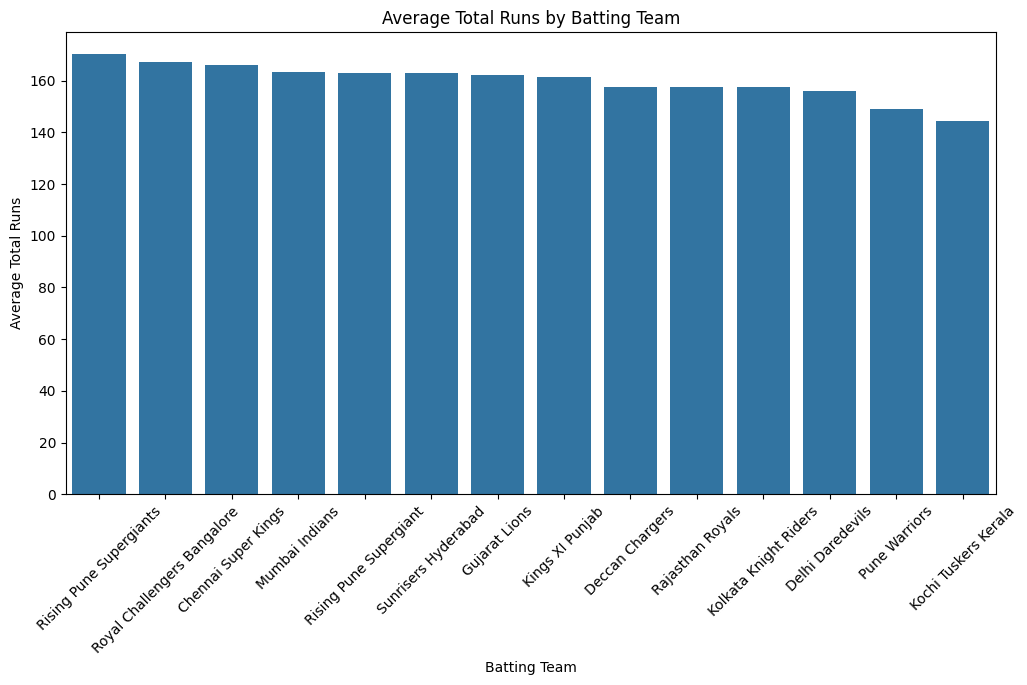

In [14]:
plt.figure(figsize=(12,6))
avg_total_by_team = df.groupby('bat_team')['total'].mean().sort_values(ascending=False)

sns.barplot(x=avg_total_by_team.index, y=avg_total_by_team.values)
plt.xticks(rotation=45)
plt.title('Average Total Runs by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Average Total Runs')
plt.show()


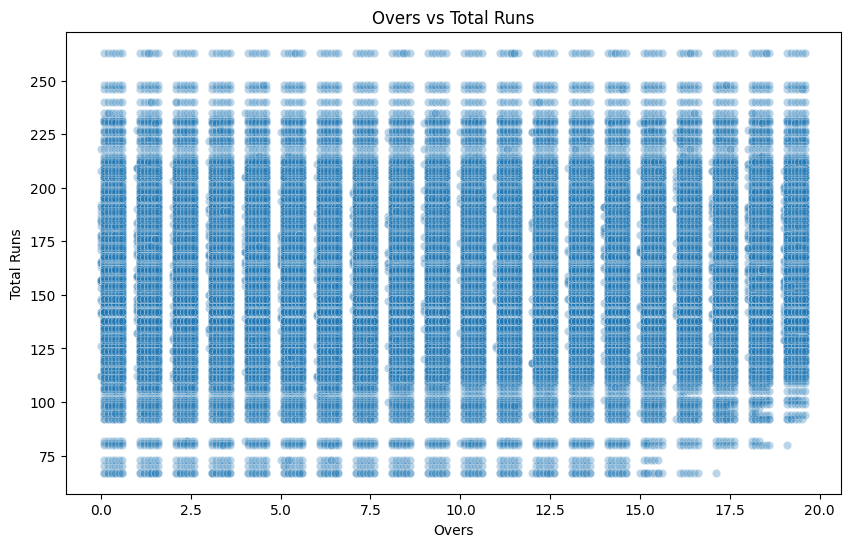

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='overs', y='total', data=df, alpha=0.3)
plt.title('Overs vs Total Runs')
plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.show()


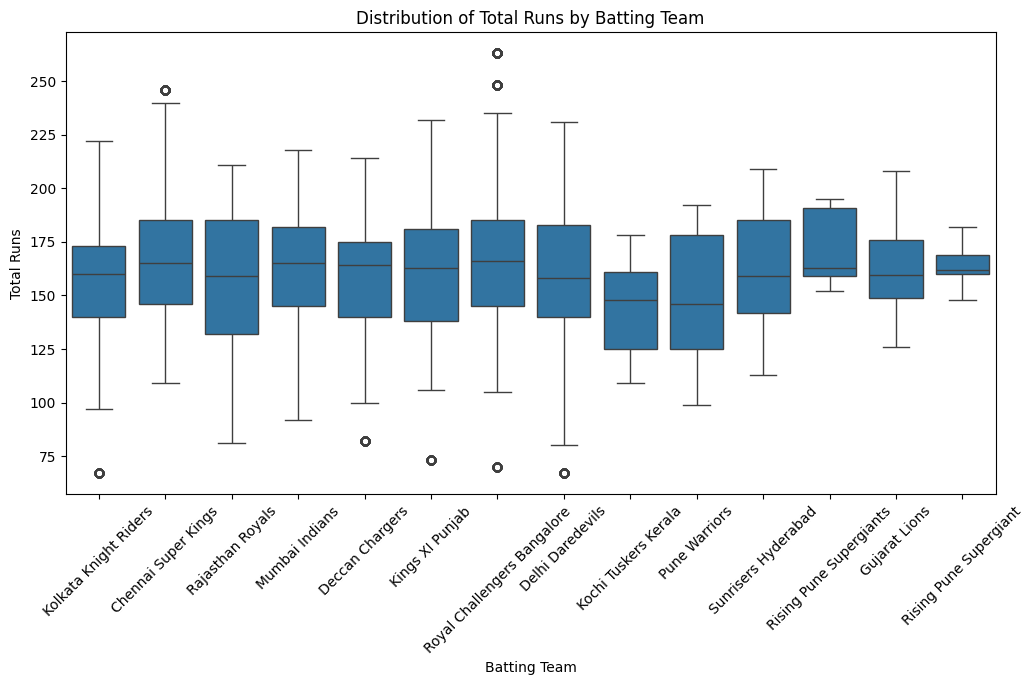

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bat_team', y='total', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Total Runs by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.show()


C:\Users\2m\AppData\Local\Temp\ipykernel_20968\2985265066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='match_name', data=top_matches, palette='viridis')


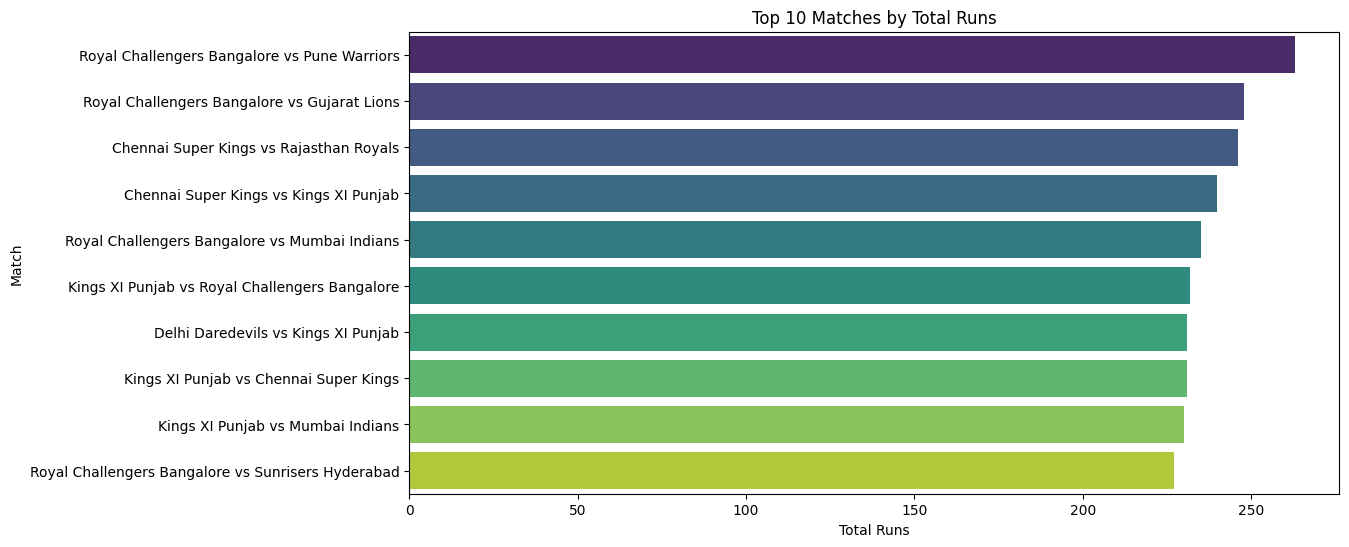

In [17]:
# نجيب أعلى 10 ماتشات بالـ total
top_matches = df.groupby(['mid', 'bat_team', 'bowl_team', 'venue'])['total'].max().nlargest(10).reset_index()

# نعمل عمود اسم الماتش للفهم
top_matches['match_name'] = top_matches['bat_team'] + " vs " + top_matches['bowl_team']

plt.figure(figsize=(12,6))
sns.barplot(x='total', y='match_name', data=top_matches, palette='viridis')
plt.title('Top 10 Matches by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Match')
plt.show()


C:\Users\2m\AppData\Local\Temp\ipykernel_20968\2589685231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


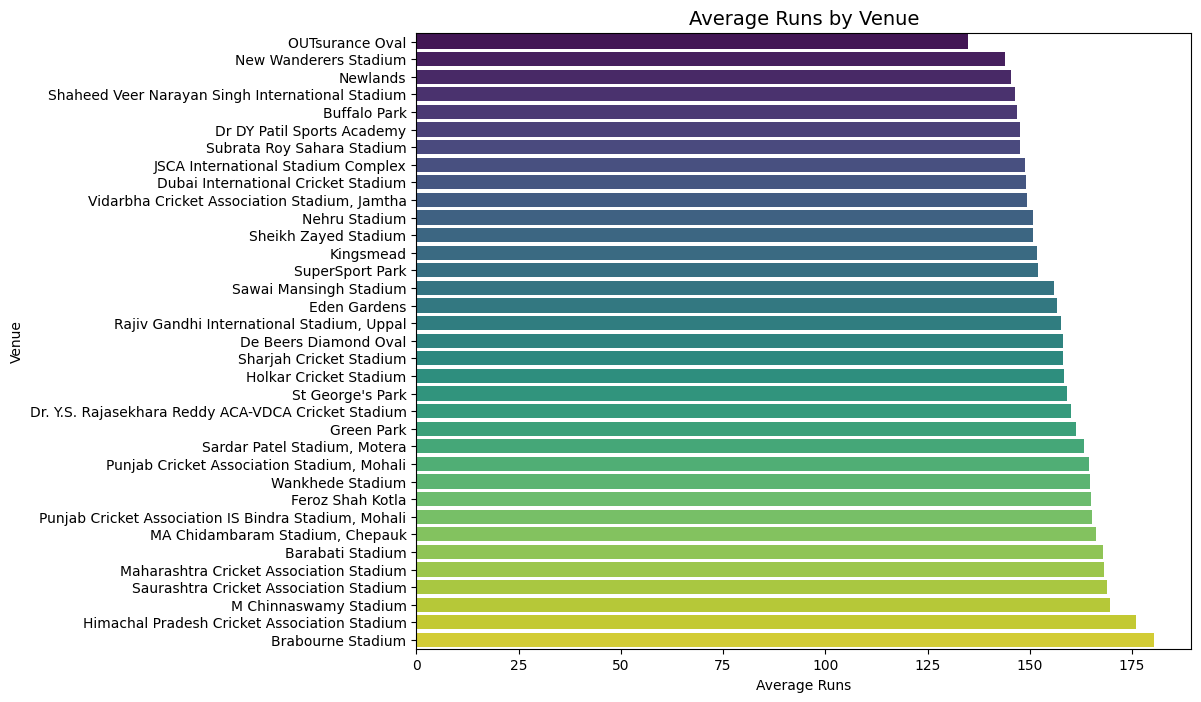

In [18]:
plt.figure(figsize=(10,8))
avg_runs_by_venue = df.groupby('venue')['total'].mean().sort_values(ascending=True)

sns.barplot(
    x=avg_runs_by_venue.values,
    y=avg_runs_by_venue.index,
    palette="viridis"
)

plt.title('Average Runs by Venue', fontsize=14)
plt.xlabel('Average Runs')
plt.ylabel('Venue')
plt.show()




C:\Users\2m\AppData\Local\Temp\ipykernel_20968\2886416248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')


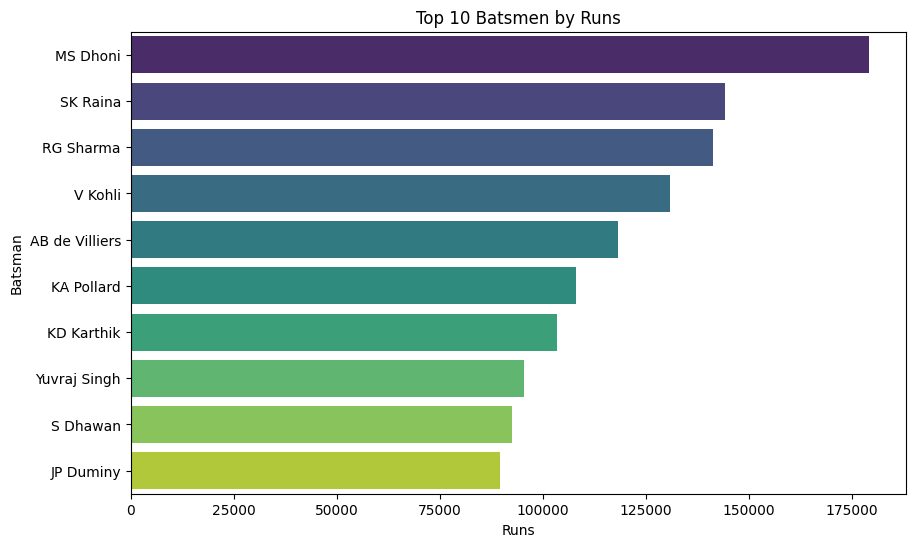

In [19]:
# Top Batsmen by Runs
top_batsmen = df.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()



C:\Users\2m\AppData\Local\Temp\ipykernel_20968\2274322278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='rocket')


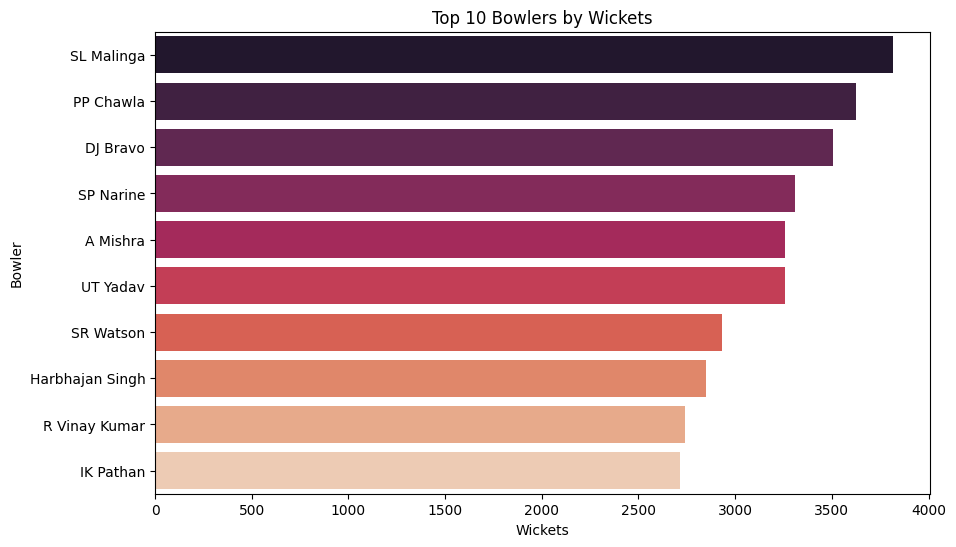

In [20]:
top_bowlers = df.groupby('bowler')['wickets'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='rocket')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

C:\Users\2m\AppData\Local\Temp\ipykernel_20968\2771701600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='cubehelix')


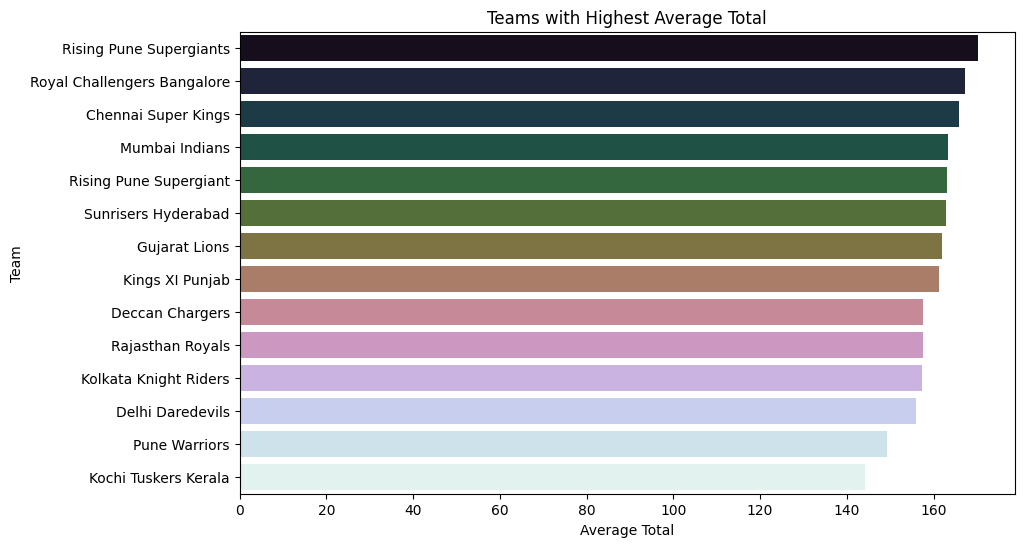

In [21]:
top_teams = df.groupby('bat_team')['total'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='cubehelix')
plt.title('Teams with Highest Average Total')
plt.xlabel('Average Total')
plt.ylabel('Team')
plt.show()

In [ ]:
# ===== Feature Selection =====
# Drop columns that cause leakage or are irrelevant
leakage_cols = ["total", "mid", "date"]  # target + IDs + date
df_clean = df.drop(columns=leakage_cols, errors="ignore")

# Check correlation with target for numerical features
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation = numeric_df.corrwith(df["total"]).abs().sort_values(ascending=False)
print("\nCorrelation with target:\n", correlation)

# Optionally drop features with very high correlation (possible leakage)
high_corr_features = correlation[correlation > 0.95].index.tolist()
df_clean = df_clean.drop(columns=high_corr_features, errors="ignore")

# Update X and y
X = df_clean
y = df["total"]

print(f"\nFinal features used: {X.columns.tolist()}")



Correlation with target:
 striker           0.381664
runs_last_5       0.368253
wickets           0.337343
non-striker       0.293233
wickets_last_5    0.273475
runs              0.254498
overs             0.022282
dtype: float64

Final features used: ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker']


In [41]:


# الفيتشر المختارة
selected_features = [
    'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
    'runs', 'wickets', 'overs', 'runs_last_5',
    'wickets_last_5', 'striker', 'non-striker'
]

columns = ["Gradient Boosting", "Random Forest", "CatBoost", "Lasso"]
result_rmse, result_mae, result_r2, result_mape = [], [], [], []

def all_models(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
    
    result_rmse.append(rmse)
    result_mae.append(mae)
    result_r2.append(r2)
    result_mape.append(mape)

# استخدام الفيتشر المختارة
X = df[selected_features]
y = df["total"]

# الأعمدة الكاتيجوري
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# البروسيسور
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# الموديلات
models = [
    Pipeline([("preprocessor", preprocessor), ("regressor", GradientBoostingRegressor(random_state=42))]),
    Pipeline([("preprocessor", preprocessor), ("regressor", RandomForestRegressor(random_state=42))]),
    Pipeline([("preprocessor", preprocessor), ("regressor", CatBoostRegressor(verbose=0, random_state=42))]),
    Pipeline([("preprocessor", preprocessor), ("regressor", Lasso(alpha=0.1, random_state=42))])
]

# تشغيل الموديلات
for m in models:
    all_models(m)

# النتيجة النهائية
final_result = pd.DataFrame({
    "Algorithm": columns,
    "RMSE": result_rmse,
    "MAE": result_mae,
    "R2": result_r2,
    "MAPE%": result_mape
}).sort_values(by="R2", ascending=False)

print(final_result)


           Algorithm       RMSE        MAE        R2     MAPE%
1      Random Forest   7.045339   4.010698  0.941153  2.624897
2           CatBoost  12.431226   8.924830  0.816791  5.860797
0  Gradient Boosting  19.263681  14.305010  0.560056  9.520729
3              Lasso  20.042114  14.787195  0.523781  9.838554
